In [1]:
import os
from PIL import Image
from matplotlib import pyplot as plt

In [2]:
#root = 'C:/Users/Vijay/OneDrive/Desktop/plant disease detection/New Plant Diseases Dataset(Augmented)/train/Pepper,_bell___healthy'
root = 'C:/Users/DELL/Desktop/plant/trainn/Pepper,_bell___healthy'
fnames=os.listdir(root)

In [3]:
len(fnames)

208

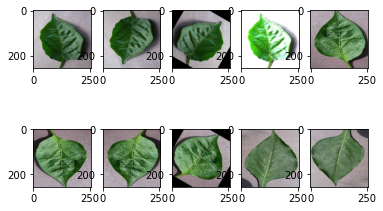

In [4]:

fig,axs=plt.subplots(nrows=2,ncols=5)
axs=axs.flatten()
for i in range(10):
     filepath=os.path.join(root,fnames[i])
     img=Image.open(filepath)
     axs[i].imshow(img)
     #axs[i].axis('off')
     #axs[i].set_title(fnames[i])
plt.show()

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import pandas as pd
import os
import cv2

# Define some constants
IMG_HEIGHT, IMG_WIDTH = 224, 224
EPOCHS = 25
BATCH_SIZE = 100

# Load the dataset
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1.0/255)

train_dir = 'C:/Users/DELL/Desktop/plant/trainn'
valid_dir = 'C:/Users/DELL/Desktop/plant/validd'

train_generator = train_datagen.flow_from_directory(train_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 batch_size=BATCH_SIZE,
                                                 class_mode='categorical')

validation_generator = valid_datagen.flow_from_directory(valid_dir,
                                             target_size=(IMG_HEIGHT, IMG_WIDTH),
                                             batch_size=BATCH_SIZE,
                                             class_mode='categorical')

                                                                                             

Found 1100 images belonging to 5 classes.
Found 445 images belonging to 5 classes.


In [6]:
# Create a model

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')  # Assuming 3 classes (e.g., healthy, diseased1, diseased2)
])

# Compile the model

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'],run_eagerly=True)
# Train the model
#model.fit(training_set, steps_per_epoch=len(os.listdir(train_dir))//BATCH_SIZE, epochs=EPOCHS, validation_data=valid_set, validation_steps=len(os.listdir(valid_dir))//BATCH_SIZE)
# Create a model checkpoint to save the best model during training
checkpoint = ModelCheckpoint("plant_disease_model.h5", save_best_only=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[checkpoint]
)
#np.save('training_history.npy', history.history)

Epoch 1/25
11/11 [==============================] - 119s 11s/step - loss: 1.5061 - accuracy: 0.3618 - val_loss: 1.5377 - val_accuracy: 0.2400
Epoch 2/25
11/11 [==============================] - 119s 11s/step - loss: 1.3876 - accuracy: 0.4027 - val_loss: 1.4201 - val_accuracy: 0.3100
Epoch 3/25
11/11 [==============================] - 116s 10s/step - loss: 1.2673 - accuracy: 0.4909 - val_loss: 1.2367 - val_accuracy: 0.4425
Epoch 4/25
11/11 [==============================] - 116s 10s/step - loss: 1.1989 - accuracy: 0.5100 - val_loss: 1.2501 - val_accuracy: 0.4100
Epoch 5/25
11/11 [==============================] - 117s 10s/step - loss: 1.1131 - accuracy: 0.5564 - val_loss: 1.0364 - val_accuracy: 0.5775
Epoch 6/25
11/11 [==============================] - 118s 11s/step - loss: 1.0719 - accuracy: 0.5618 - val_loss: 0.9776 - val_accuracy: 0.5925
Epoch 7/25
11/11 [==============================] - 116s 10s/step - loss: 0.9837 - accuracy: 0.6091 - val_loss: 0.8603 - val_accuracy: 0.6600
Epoch 

In [7]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("plant_disease_model.h5")


In [8]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {loss}, Validation Accuracy: {accuracy}")
loss, accuracy = model.evaluate(train_generator)
print(f"train Loss: {loss}, train Accuracy: {accuracy}")

5/5 [==============================] - 5s 730ms/step - loss: 0.5320 - accuracy: 0.8022
Validation Loss: 0.5319875478744507, Validation Accuracy: 0.802247166633606
11/11 [==============================] - 21s 2s/step - loss: 0.4508 - accuracy: 0.8336
train Loss: 0.4507504105567932, train Accuracy: 0.8336363434791565


In [9]:
# Assuming you have a test directory similar to the training and validation directories
test_dir = 'C:/Users/DELL/Desktop/plant/testtt'

# Create a test data generator
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                  batch_size=BATCH_SIZE,
                                                  class_mode='categorical')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // BATCH_SIZE)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Optionally, you can make predictions on the test set
predictions = model.predict(test_generator, steps=test_generator.samples // BATCH_SIZE)

# You can then use the predictions for further analysis or visualization


Found 445 images belonging to 5 classes.
4/4 [==============================] - 4s 870ms/step - loss: 0.5300 - accuracy: 0.8000
Test Loss: 0.5299859046936035
Test Accuracy: 0.800000011920929
4/4 [==============================] - 5s 1s/step


In [10]:
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model('plant_disease_model.h5')

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [22]:
# Save the training history for later reference
np.save('training_history.npy', history.history)
# Load the training history
history = np.load('training_history.npy', allow_pickle=True).item()

In [11]:
import matplotlib.pyplot as plt

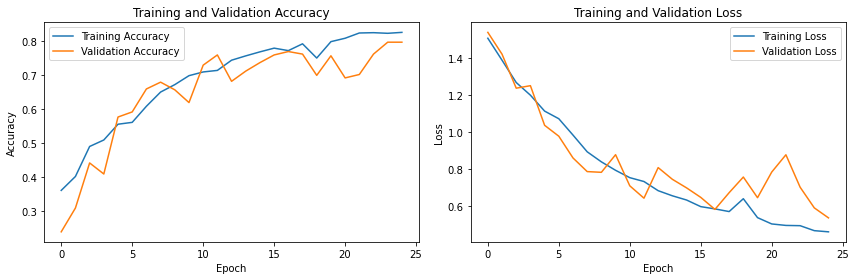

In [12]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

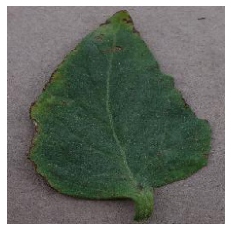

1/1 [==============================] - 0s 117ms/step
Predicted Label: Tomato___Bacterial_spot


In [13]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def load_and_predict(image_path, model):
    # Load the image
    img = image.load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    
    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    
    # Expand the dimensions to match the model's expected input shape
    img_array = np.expand_dims(img_array, axis=0)
    
    # Normalize the image
    img_array = img_array / 255.0
    
    # Make a prediction
    predictions = model.predict(img_array)
    
    # Get the predicted class
    predicted_class = np.argmax(predictions, axis=1)[0]
    
    # Get the class labels from the training generator
    class_labels = list(train_generator.class_indices.keys())
    
    # Get the predicted class label
    predicted_label = class_labels[predicted_class]
    
    # Display the predicted disease name
    print("Predicted Label:", predicted_label)
    
    return predicted_label, predictions

# Example usage:
image_path = 'C:/Users/DELL/Desktop/plant/img.jpg'  # Replace with the path to your image
predicted_label, predictions = load_and_predict(image_path, model)
